In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
#from https://github.com/tensorflow/tensorflow/issues/33285 used because getting an error

import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#want to scale/normalize data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)


#two types of models
model = tf.keras.models.Sequential()

#what does flatten do?
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

#output layer: probability distribution
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

#AI tries to minimize loss: look into optimizers (10 kera ways?) Binary in case of cats/dogs?
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 2s 977us/step - loss: 0.2534 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1048 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0725 - accuracy: 0.9775


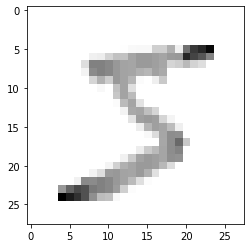

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
#plt.imshow(x_test[0])

In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 620us/step - loss: 0.1126 - accuracy: 0.9661
0.11257341504096985 0.9660999774932861


In [6]:
model.save('num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_reader.model/assets


In [7]:
new_model = tf.keras.models.load_model('num_reader.model')

In [8]:
predictions = new_model.predict([x_test])

In [9]:
import numpy as np
print(np.argmax(predictions[1]))

2


In [10]:
#how to load in an outside data set 
import cv2
import os

In [11]:
DATADIR = "/Users/tanyajain/Downloads/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog", "Cat"]

In [12]:
training_data = []
IMG_SIZE = 100

print(os.listdir(DATADIR))
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #gets into cats or dogs directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #print(path)
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
            
create_training_data()
print(len(training_data))

['Cat', '.DS_Store', 'Dog']
24946


In [13]:
import random
random.shuffle(training_data)

In [14]:
for sample in training_data[:10]:
    print (sample[1])

1
0
0
0
1
1
0
1
1
0


In [15]:
X = []
Y = []

In [16]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)